# Data Analytics III

    1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
    2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given   dataset.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("/home/student/Documents/31170/A6/Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Checking for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Displaying the distinct species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:>

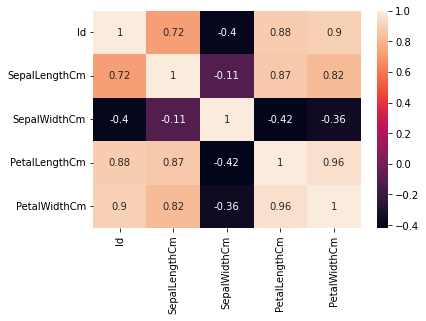

In [9]:
# Checking the correlation between the various fields
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

In [10]:
# Splitting the data into training and testing sets
X = df.iloc[: , 1:5]
Y = df.iloc[: , 5:]

In [11]:
le = LabelEncoder()

In [12]:
# Converting the data in 'Y' into a numerical interpretation
Y = le.fit_transform(Y)

/home/student/snap/jupyter/common/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Splitting the data into 75% training and 25% testing
X_train, X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [14]:
X_train.shape

(112, 4)

In [15]:
Y_train.shape

(112,)

In [16]:
X_test.shape

(38, 4)

In [17]:
Y_test.shape

(38,)

In [18]:
# Creating Naive-Bayes Model and applying it on our dataset 
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
pred = naive_bayes.predict(X_test)

In [19]:
# Converting the data in 'pred' into a numerical interpretation
pred = le.fit_transform(pred)

In [20]:
# Comparing our predicted values with Y_test
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [21]:
# Comparing our predicted values with Y_test
Y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [22]:
# Creating a confusion matrix for evaluating our model
matrix = confusion_matrix(Y_test, pred, labels = naive_bayes.classes_)

In [23]:
matrix

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [24]:
tp, fn, fp, tn = confusion_matrix(Y_test, pred, labels = [1, 0]).reshape(-1)

In [25]:
tp

11

In [26]:
fn

0

In [27]:
tn

15

In [28]:
fp

0

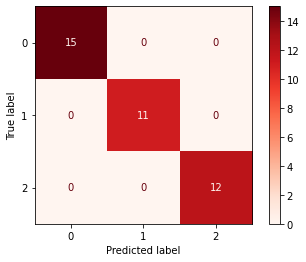

In [31]:
# Displaying the confusion matrix
c_matrix = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = naive_bayes.classes_)
c_matrix.plot(cmap = plt.cm.Reds)

In [32]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [33]:
# Displaying the calculations for accuracy, error rate, recall, and precision for the model
print("Accuracy: {:.2f}".format(accuracy_score(Y_test, pred)))
print("Error Rate: " , (fp + fn) / (tp + tn + fn + fp))
print("Recall: " , tp / (tp + fn))
print("Precision: " , tp/(tp+fp))

Accuracy: 1.00
Error Rate:  0.0
Recall:  1.0
Precision:  1.0
